<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/1018_HW_Kaggle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

# **Part1. Exploratory Data Analaysis (EDA)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/titanic_train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() # checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


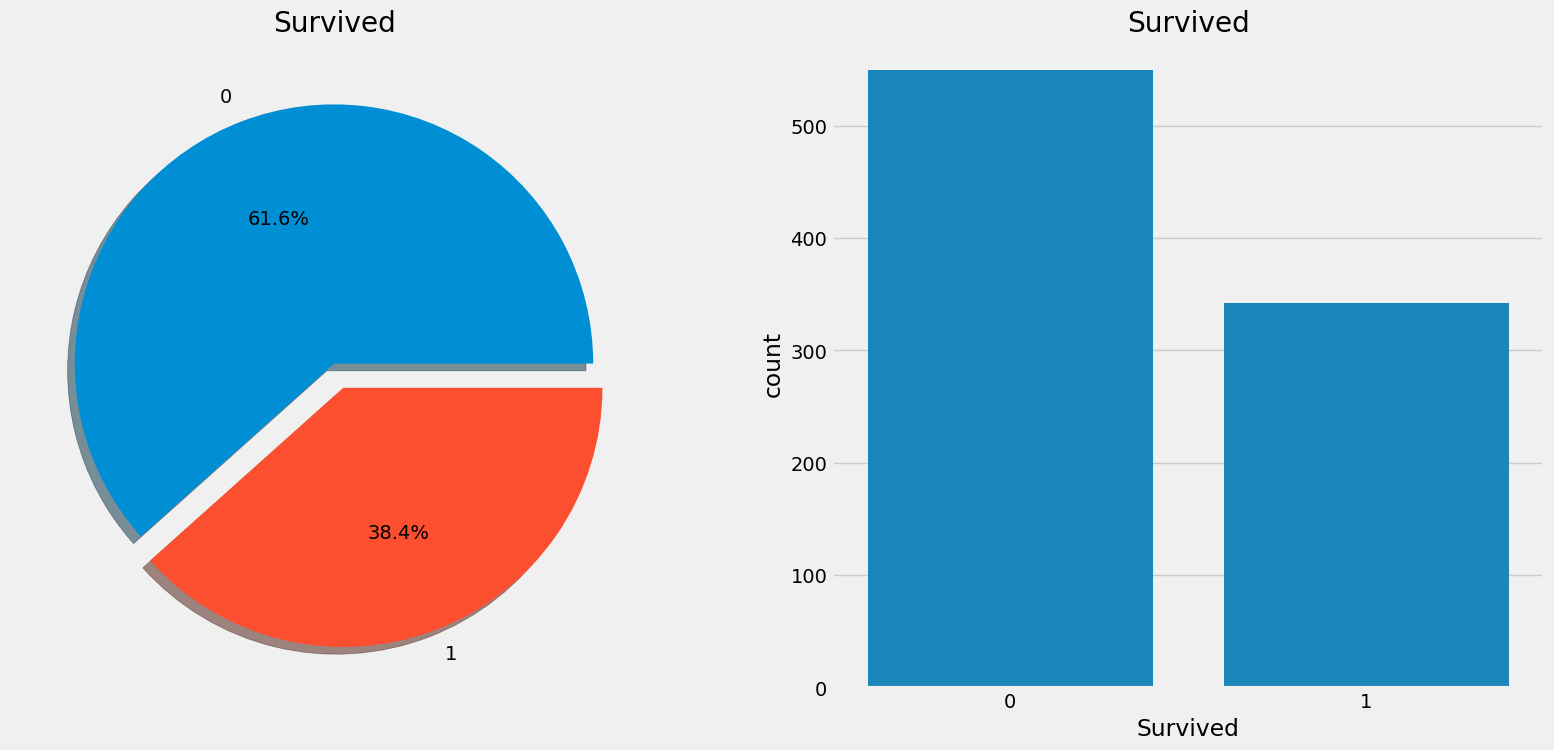

In [6]:
# How many survived?

f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**Analysing the Features**

**Sex : Categorical Feature**

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

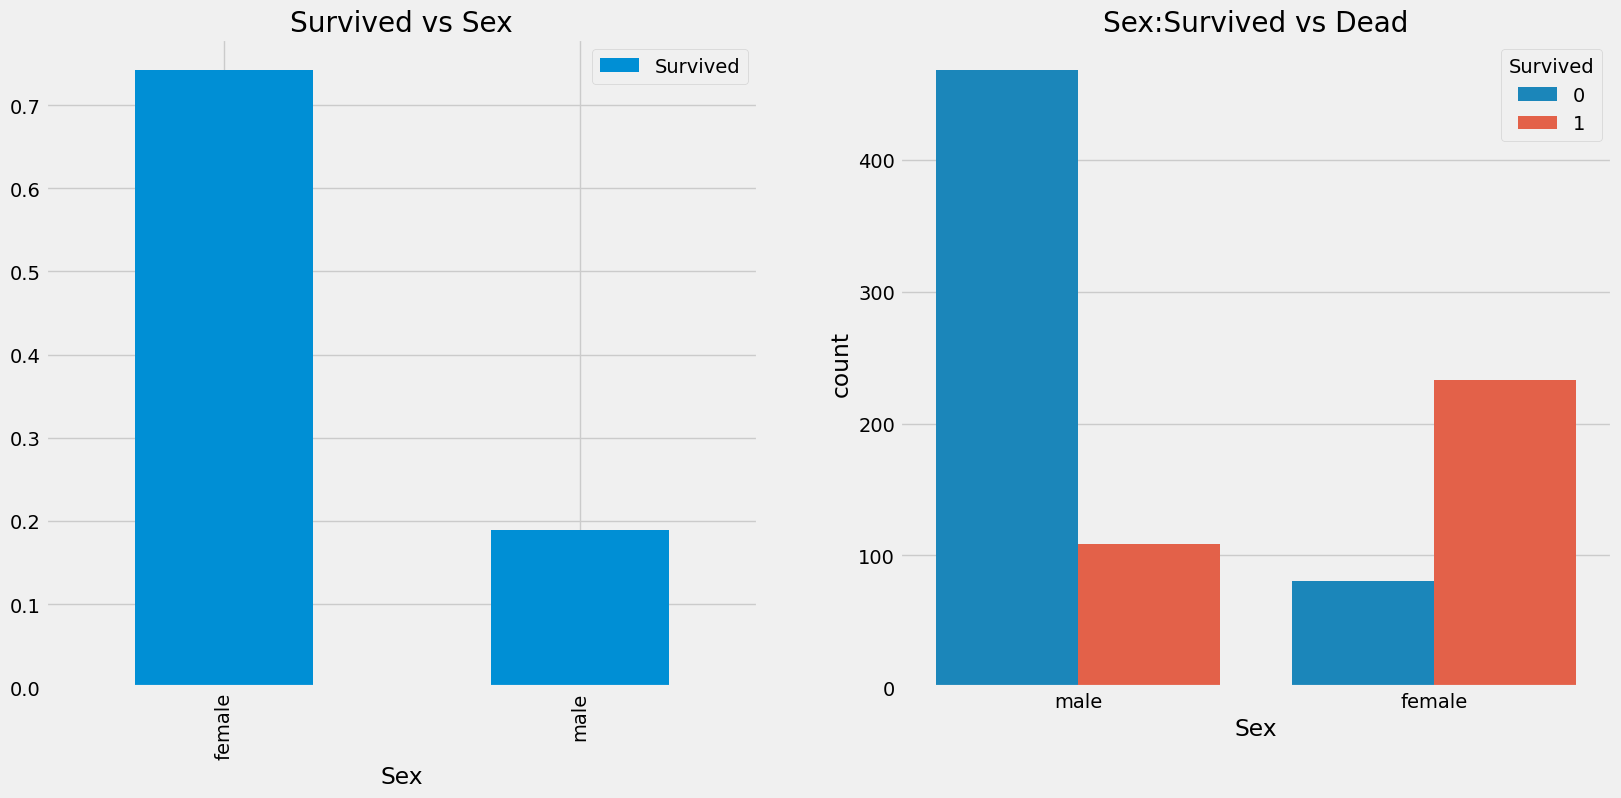

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**Pclss : Ordinal Feature**

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


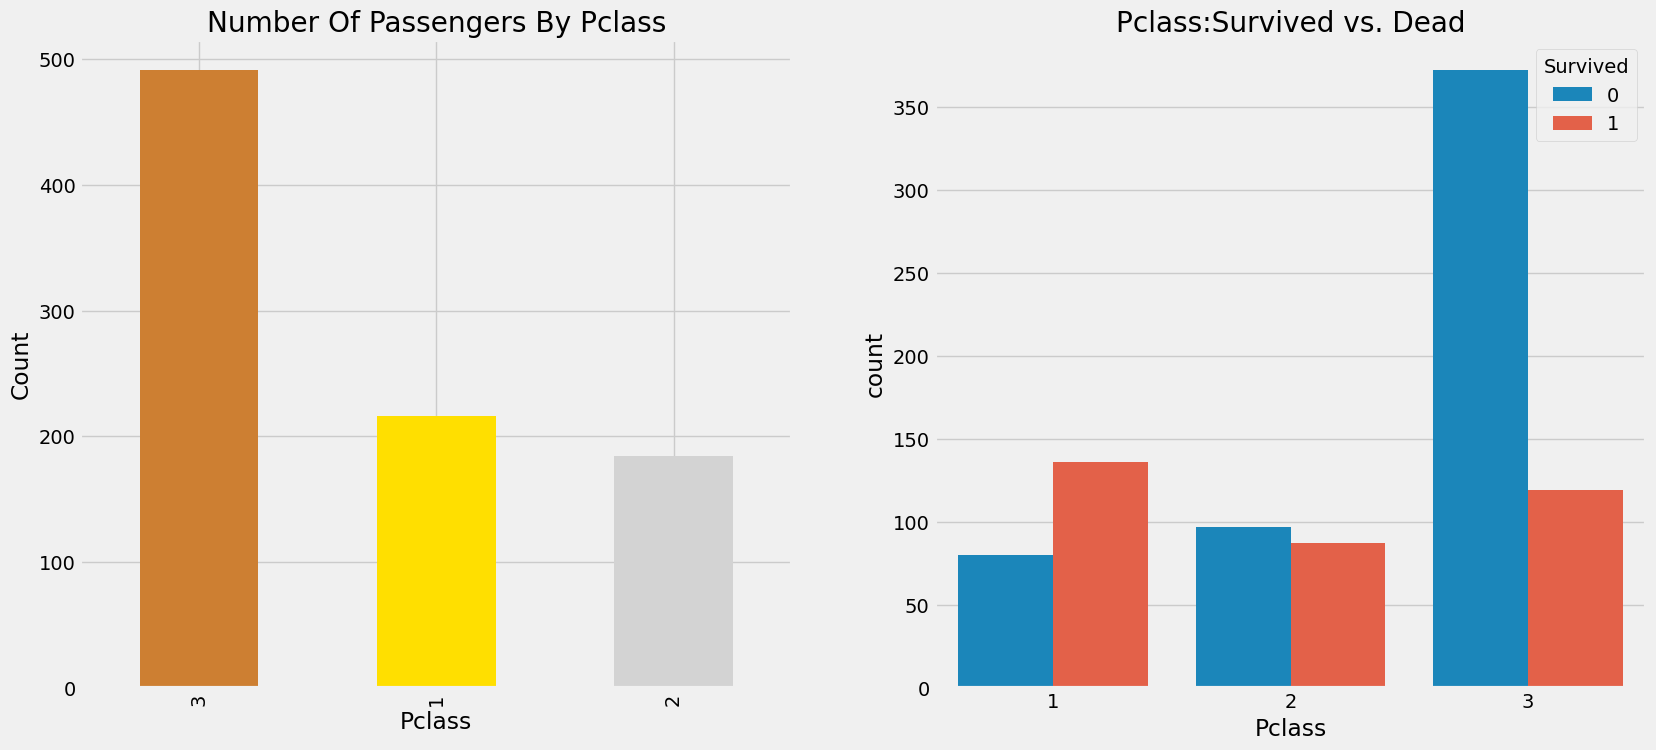

In [10]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs. Dead')
plt.show()

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

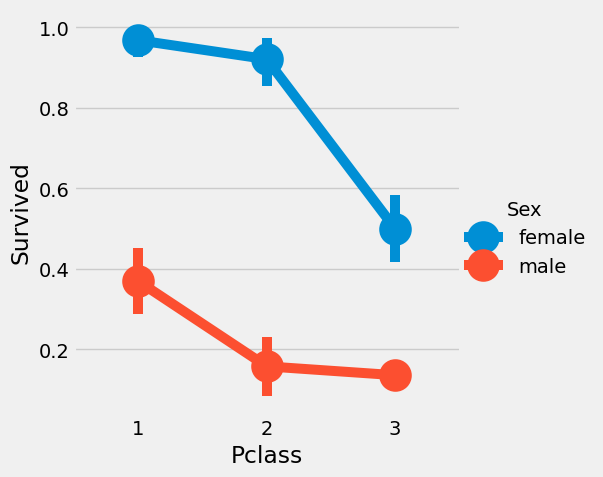

In [12]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

**Age : Continuous Feature**

In [13]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


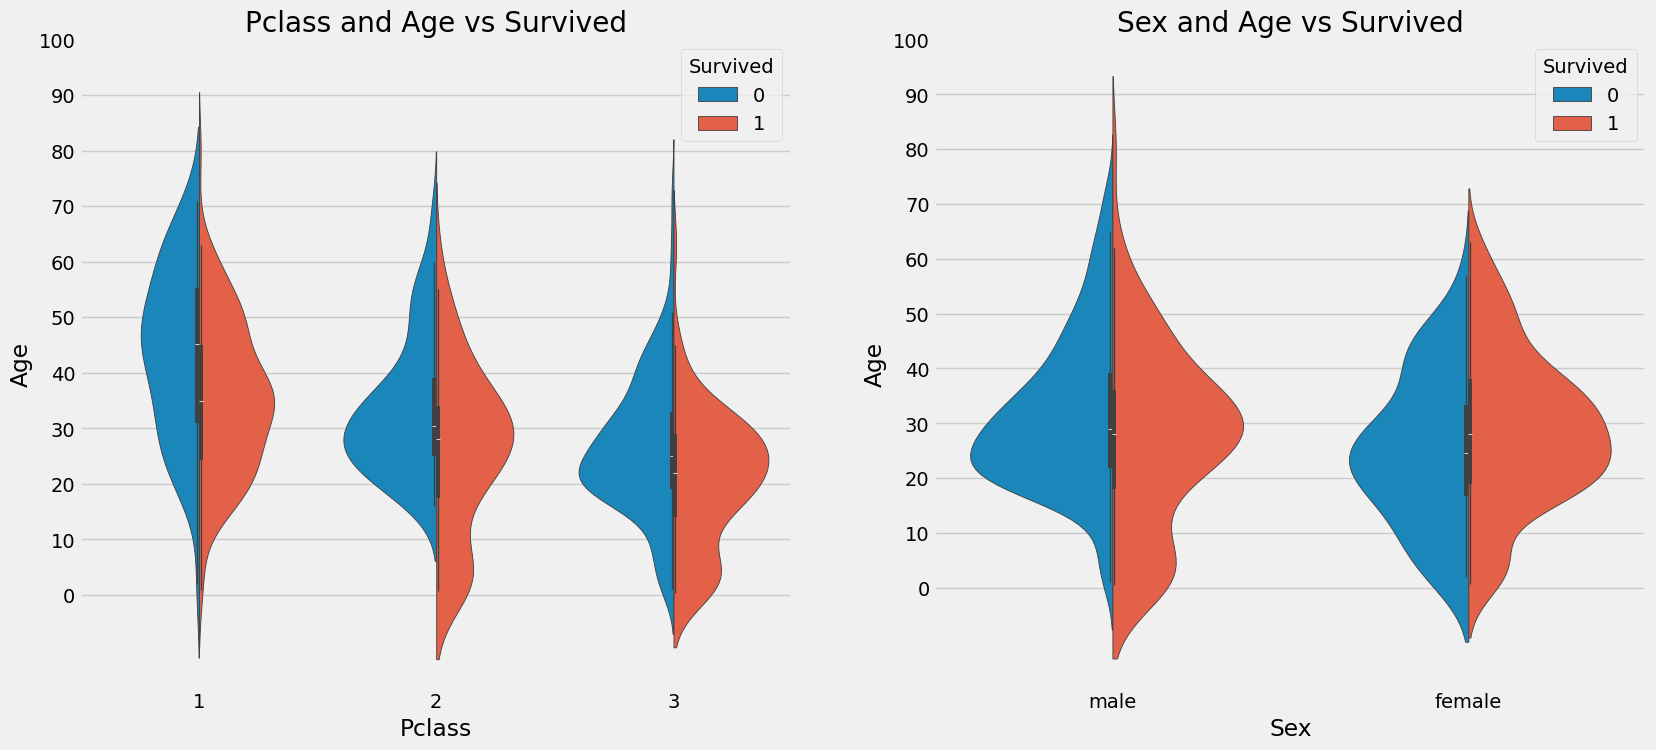

In [14]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observations:

1) The number of childeren increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass

2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women

3) For males, the survival chances decreases with an increase in age

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
# Name 칼럼에서 (대문자)+(소문자)+. 으로 된 문자열을 추출

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
# 다양한 initial들을 Miss, Mr, Mrs들로 구분
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [19]:
# Filling NaN Ages
# age 값이 NaN이라고 해서 무조건 평균으로 대체하는 것은 부정확할 수 있음
# 적당한 그룹에 따른 평균값으로 대체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any()

False

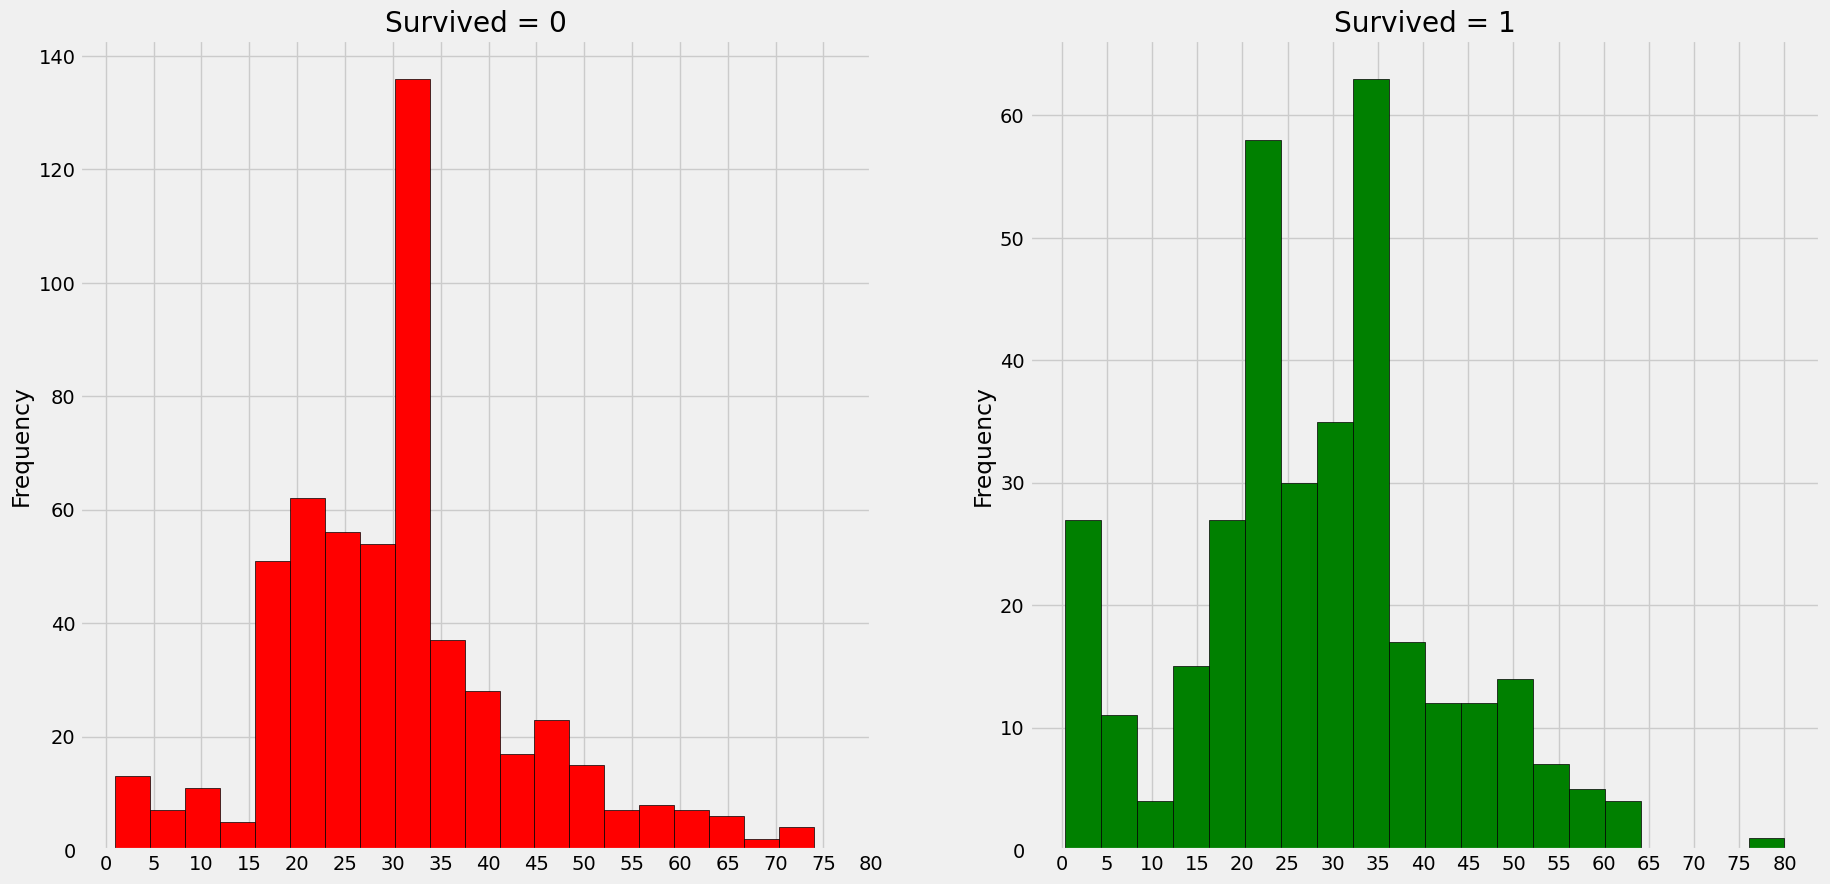

In [21]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green',bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

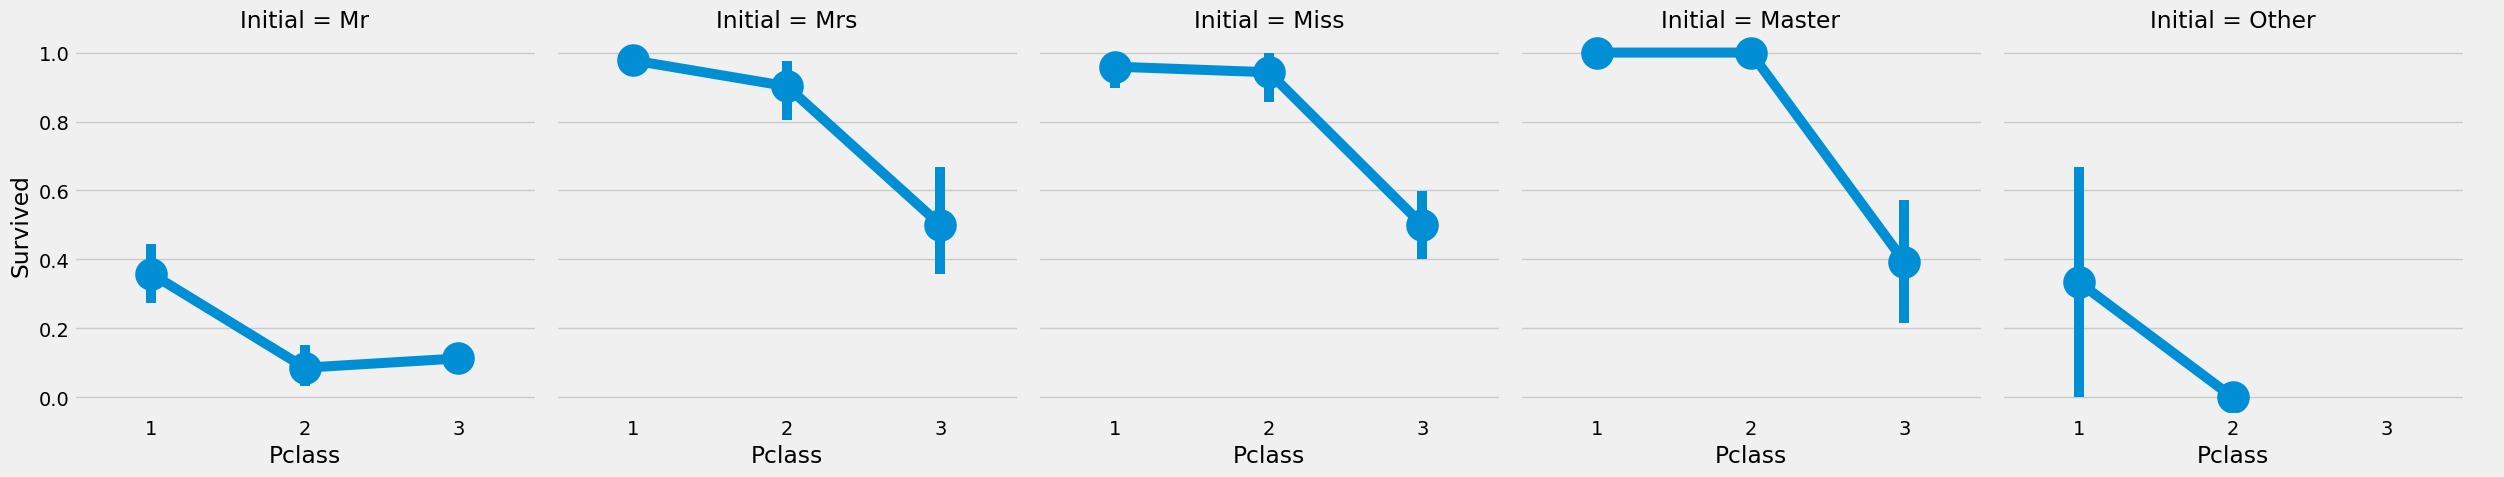

In [22]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')

Women and Child first policy : Pclass에 관계 없이 적용되었음

**Embarked : Categorical Feature**

In [23]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

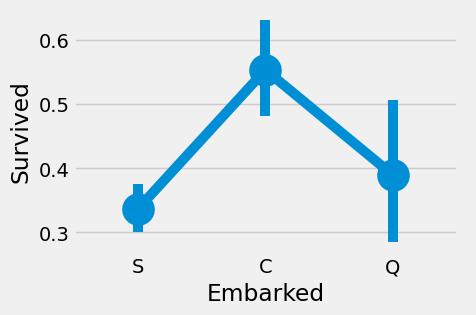

In [24]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)  # 그림 사이즈 조
plt.show()

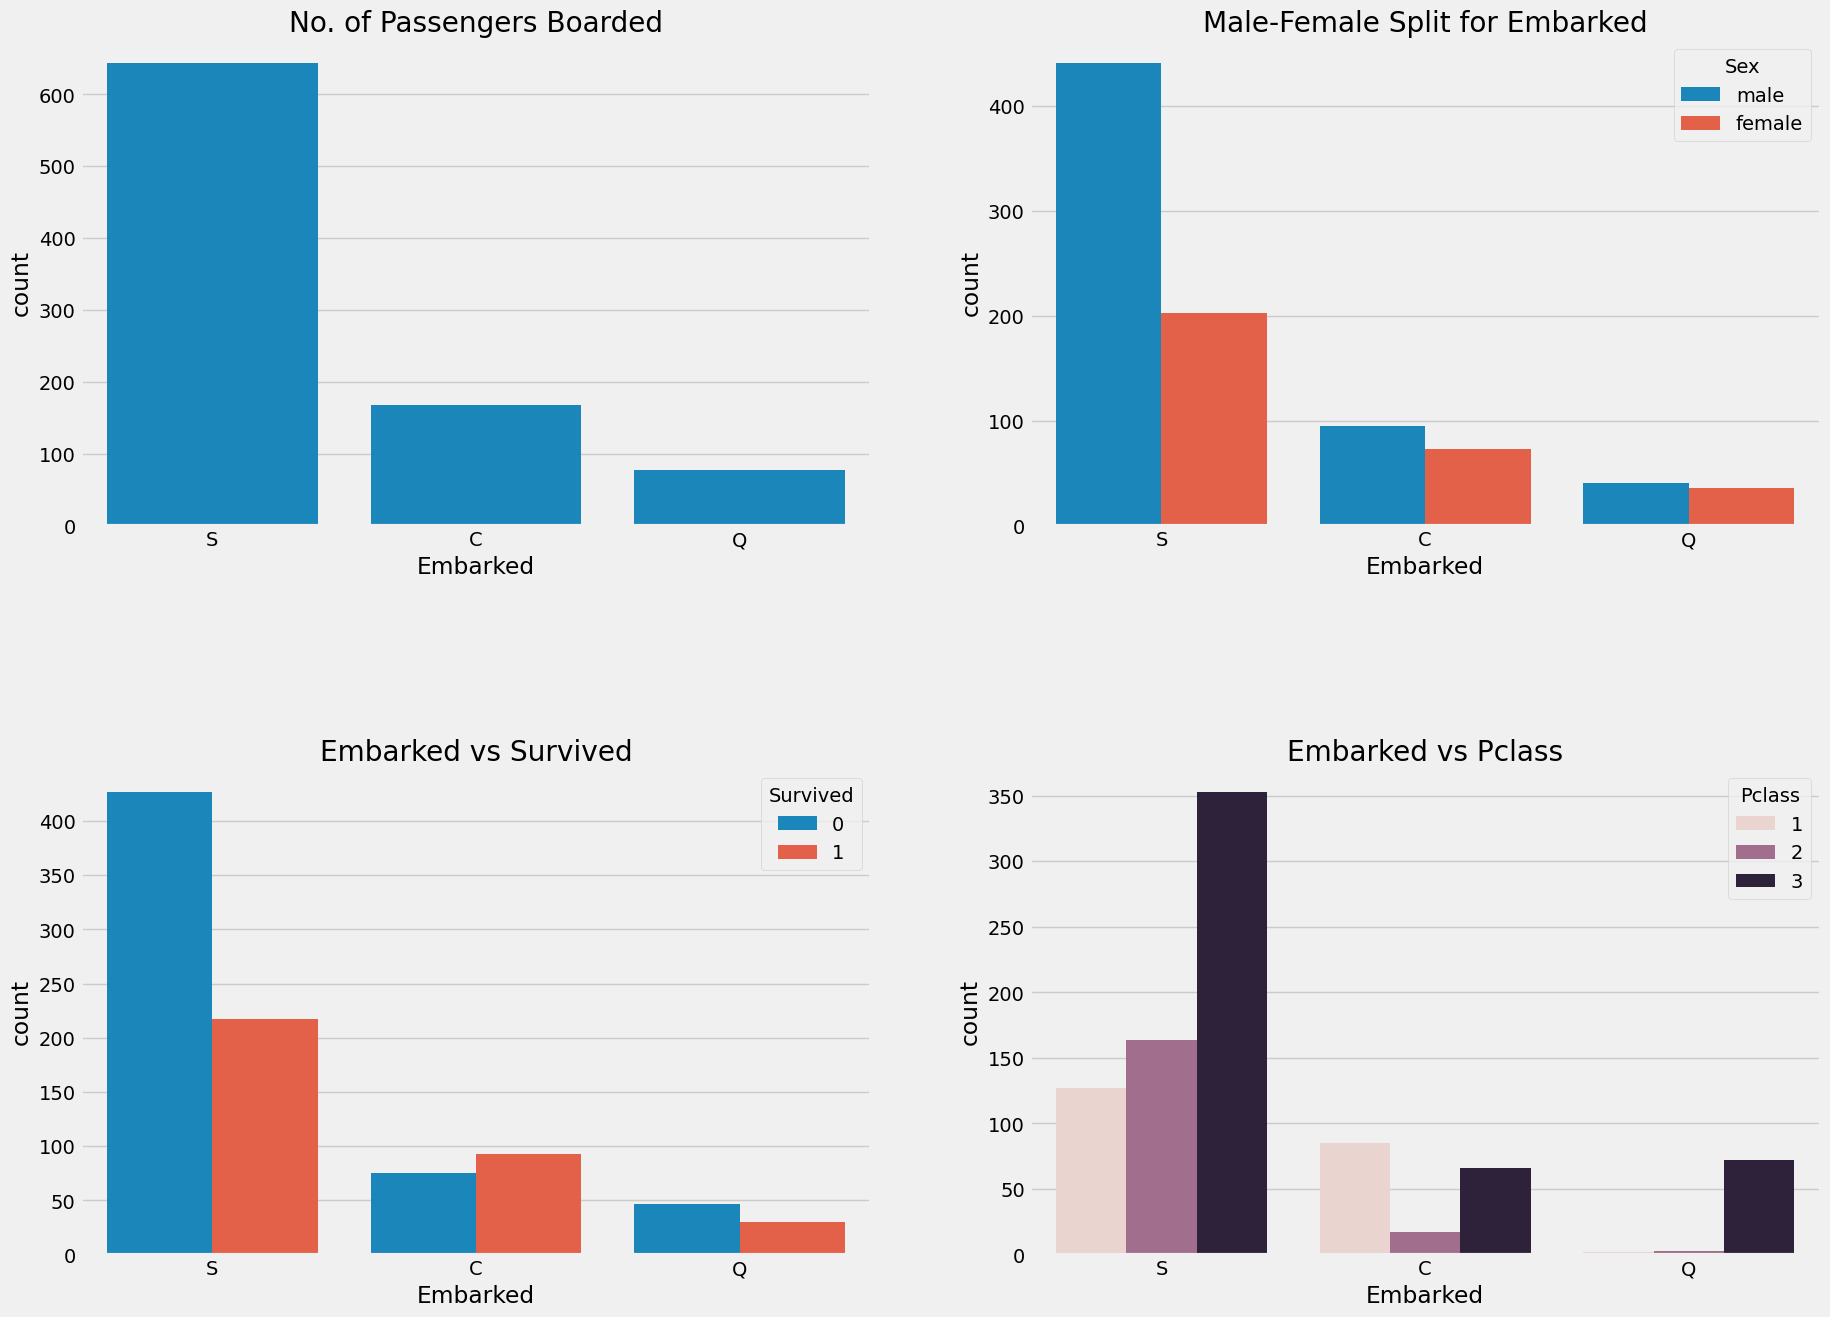

In [25]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Obsevations:

1) S 항구에서 가장 많이 탔으며 대부분은 Pclass 3이다.

2) C 항구 탑승객들은 유일하게 사망자보다 생존자가 많은데, 1/2 class의 사람들이 많이 생존했기 때문일 것으로 보인다.

3) S 항구는 대부분의 부유층이 탑승한 항구로 보인다. 생존율은 낮지만 Pclass3인 사람들이 많기 때문으로 보인다.

4) Q 항구는 95%의 승객이 Pclass3이다.

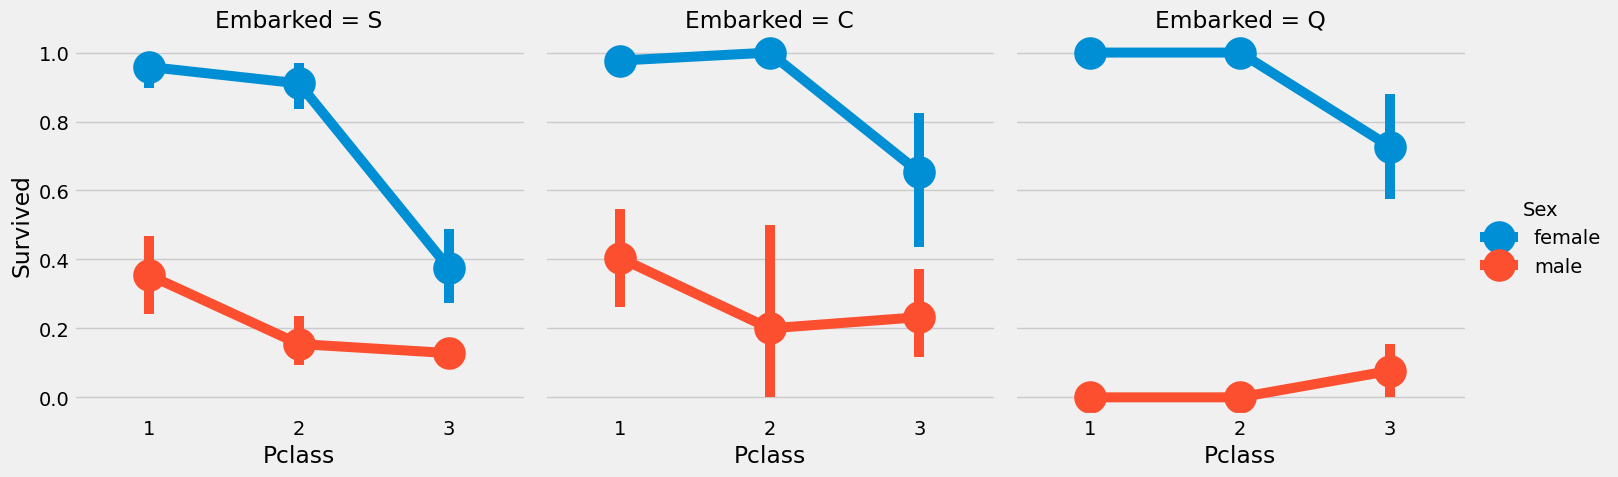

In [26]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

Observations:

1) Pclass1,2 여성의 생존율은 탑승 항구에 관계없이 거의 1로 동일하다

2) S 항구의 Pclass3 승객은 생존율이 급감하는 것으로 보아 재산이 중요한 것으로 보인다.

In [27]:
# Filling Embarked NaN
# 대부분 S 항구에서 탑승했으므로 S로 대체

data['Embarked'].fillna('S',inplace=True)

In [28]:
# check
data.Embarked.isnull().any()

False

**SibSp : Discrete Feature**

탑승객이 혼자였는지, 가족과 같이 있었는지를 나타내는 피처

Sibling : brother, sister, stepbrother, stepsister

Spouse : husband, wife

In [29]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


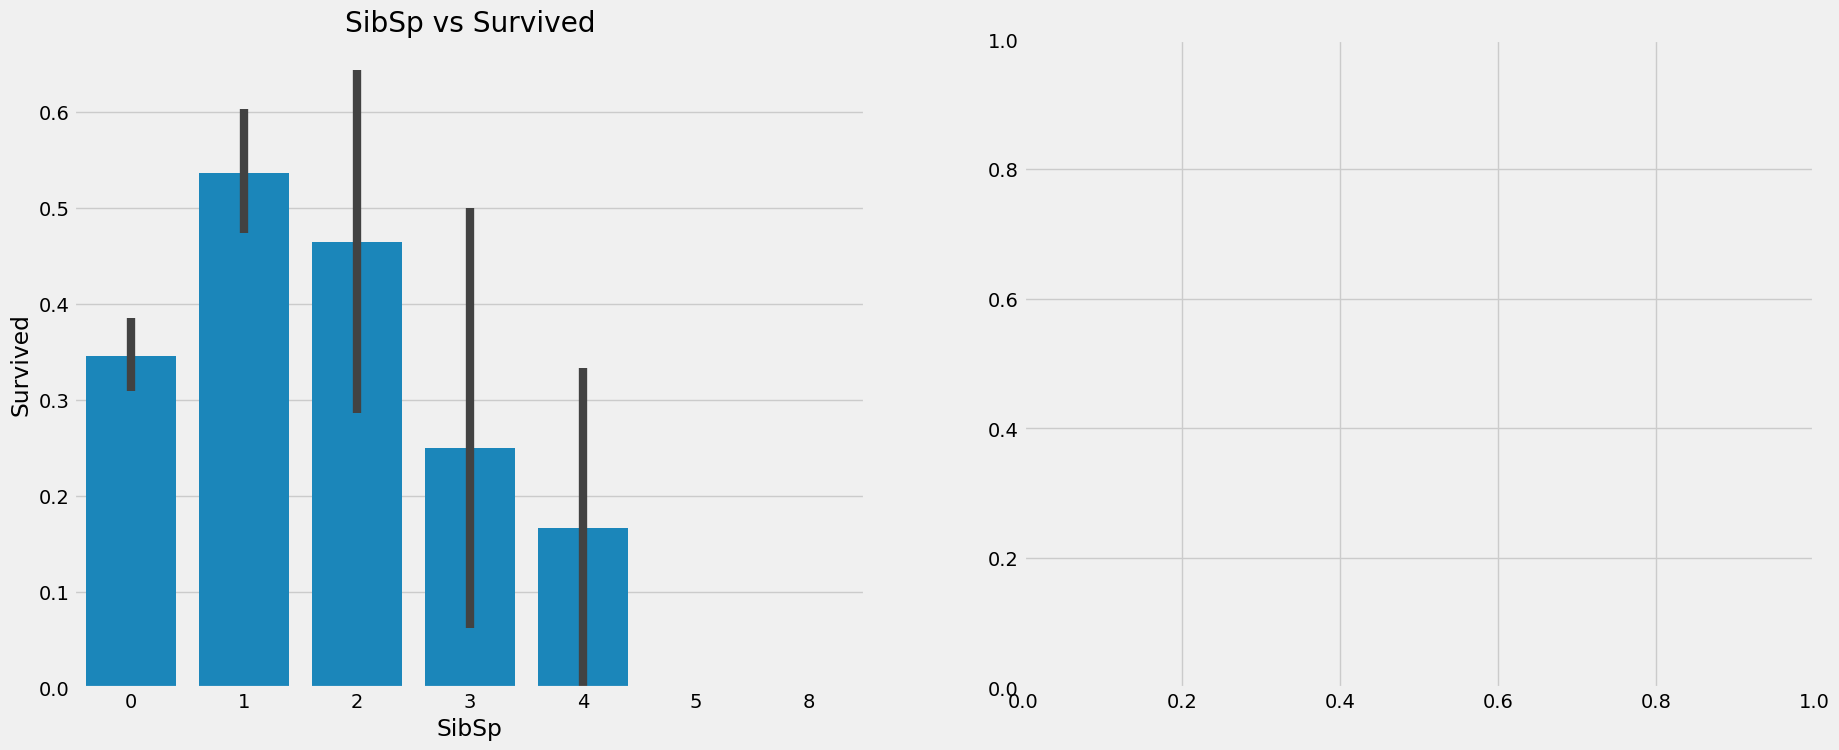

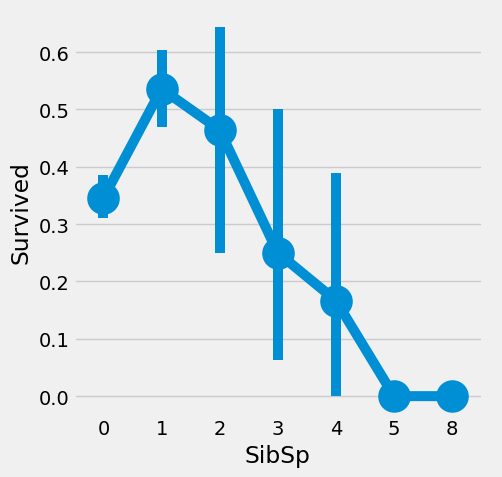

In [125]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
# catplot에서 ax 옵션이 적용되지 않으므로 따로 출력함
sns.catplot(x='SibSp', y='Survived', data=data, kind='point')
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be Pclass??

The reason is **Pclass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

**Parch**

Number of Parents/Children Aboard

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


larger families were in Pclass3

"\nsns.catplot(x='Parch',y='Survived',data=data, ax=ax[1],kind='point')\nax[1].set_title('Parch vs Survived')\nplt.close(2)\nplt.show()\n"

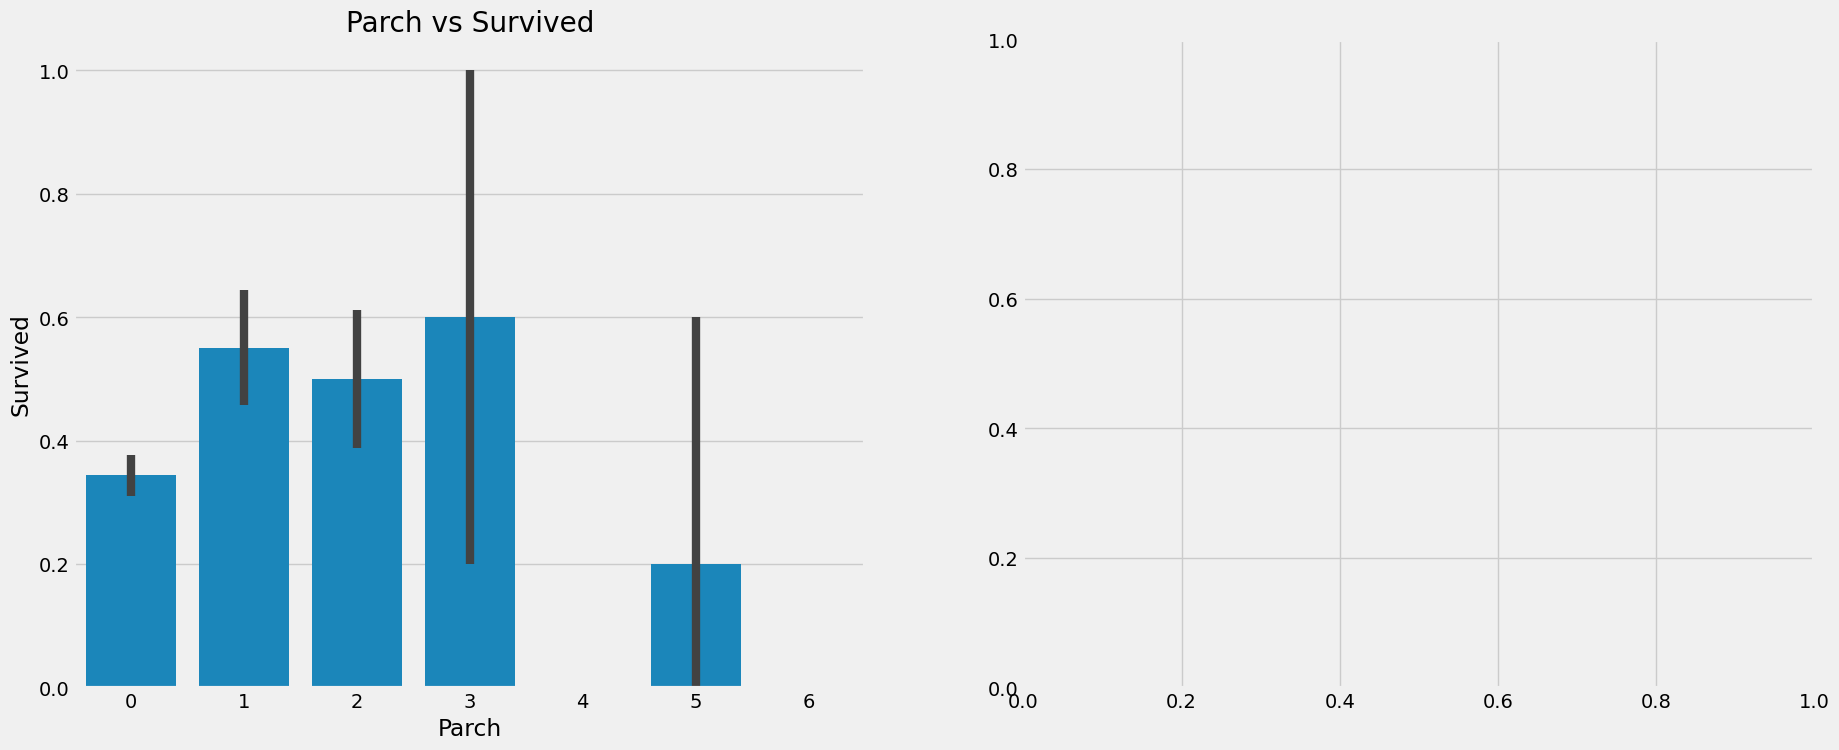

In [119]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
# catplot에서 ax 옵션이 적용되지 않으므로 아래 셀에서 따로 출력함
'''
sns.catplot(x='Parch',y='Survived',data=data, ax=ax[1],kind='point')
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()
'''

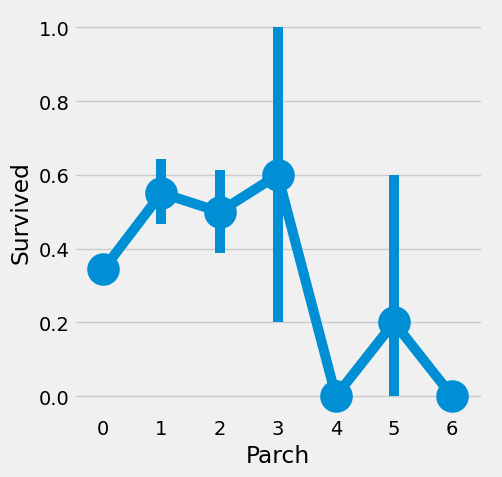

In [124]:
g=sns.catplot(x='Parch',y='Survived',data=data,kind='point')


Observations:

Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

**Fare : Continuous Feature**

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


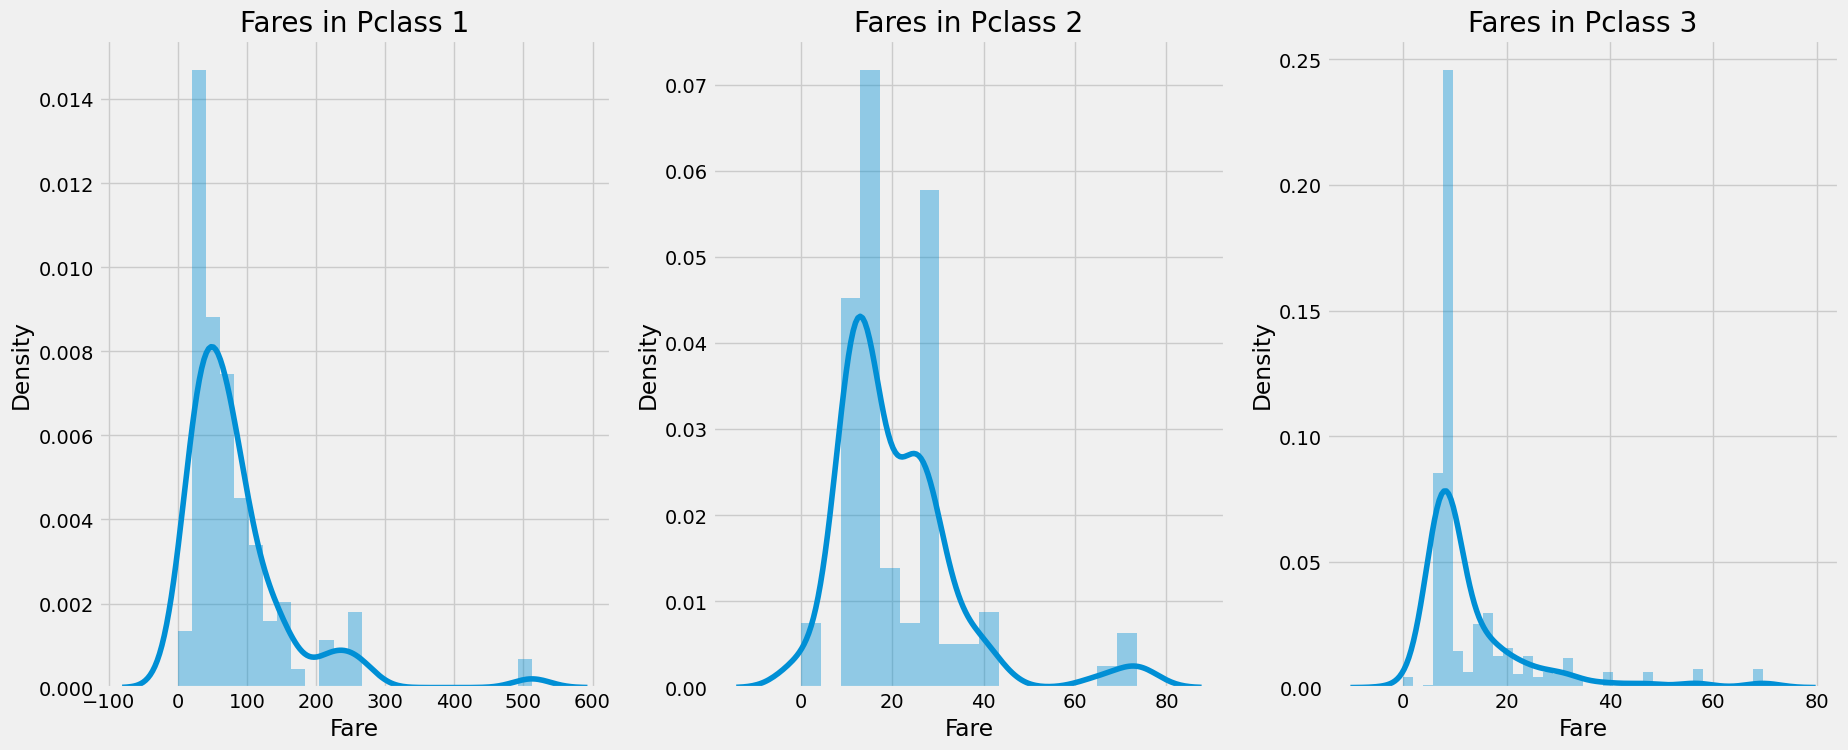

In [35]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객들의 티켓값은 넓게 분포하고, Pclass2,3 승객들의 티켓값은 좁은 범위 내에서 분포한다. 평균값 또한 줄어든다.

연속형 변수이므로 binning을 통해 이산형 분포로 변환할 수 있다.


**Correlation Between the Features**

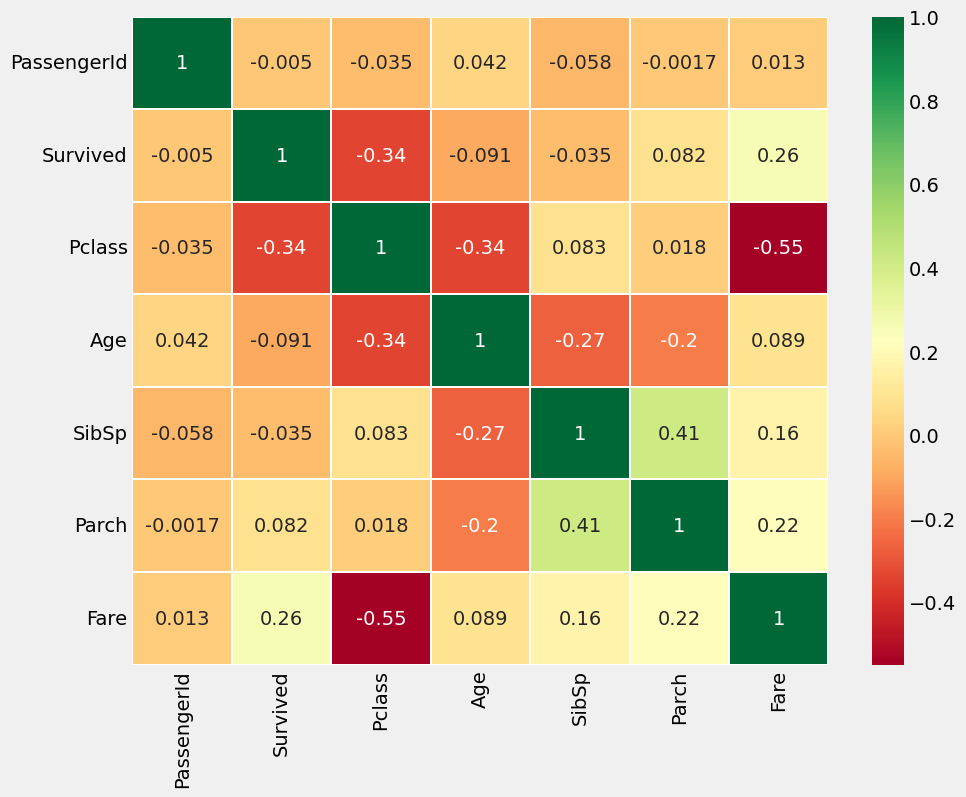

In [40]:
# correlation matrix를 그릴 때 string 값을 가진 변수가 있으면 에러 > numeric_only = True 옵션 사용
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# **Part2. Feature Engineering and Data Cleaning**

**Feature Engineering**

It is not necessary that all the features will be important. There may be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

## **Age_band**

In [42]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [43]:
# check the number of passengers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


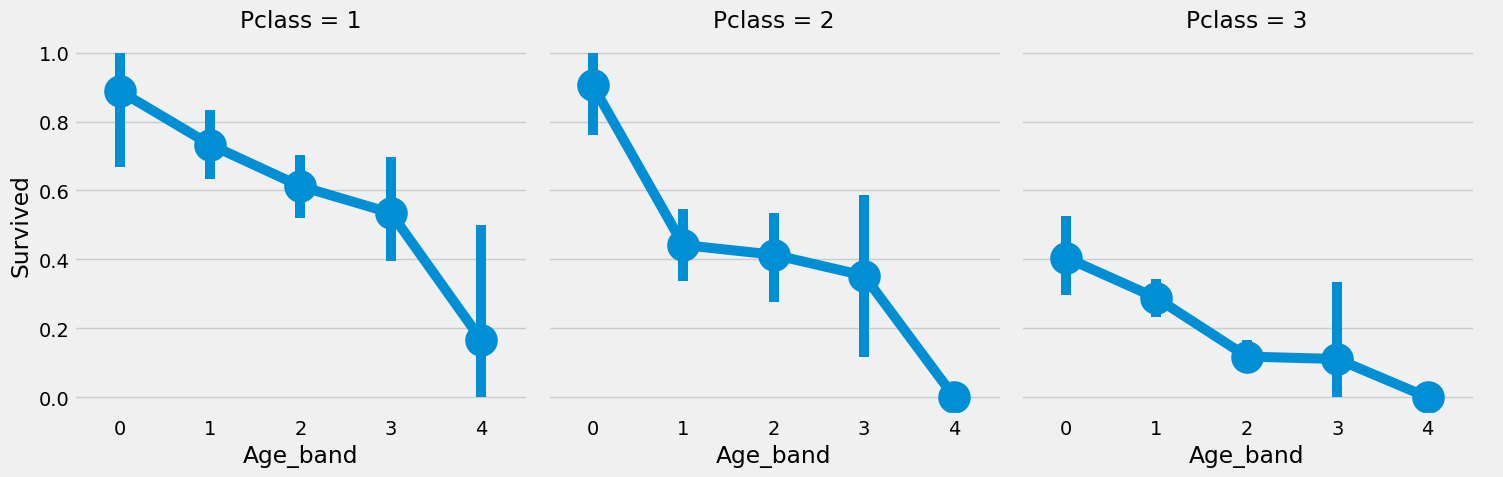

In [44]:
sns.catplot(x='Age_band',y='Survived', data=data, col='Pclass', kind='point')
plt.show()

모든 Pclass에 대해 Age_band가 클 수록 생존율이 감소함

## **Family_Size and Alone**

create a new feature called "Family_size" and "Alone" ; summation of Parch and SibSp

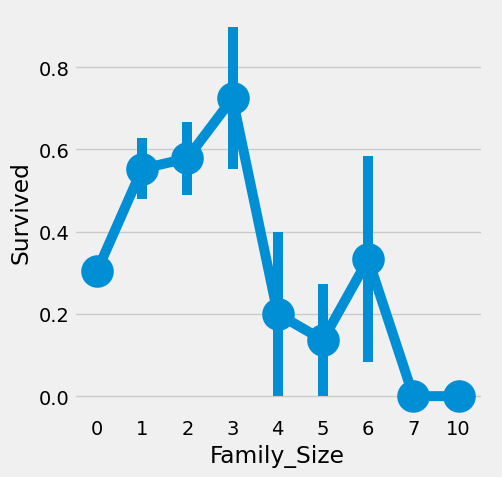

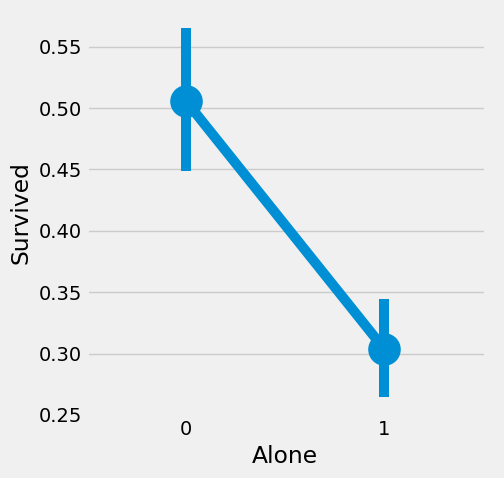

In [118]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp'] # family size
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 # Alone : 0/1, 1(Alone)

sns.catplot(x='Family_Size',y='Survived',data=data, kind='point')

sns.catplot(x='Alone', y='Survived', data=data, kind='point')

Alone=1 (family_size=0) 인 경우 생존율이 낮다. family_size=4 이상인 경우 생존율이 감소한다

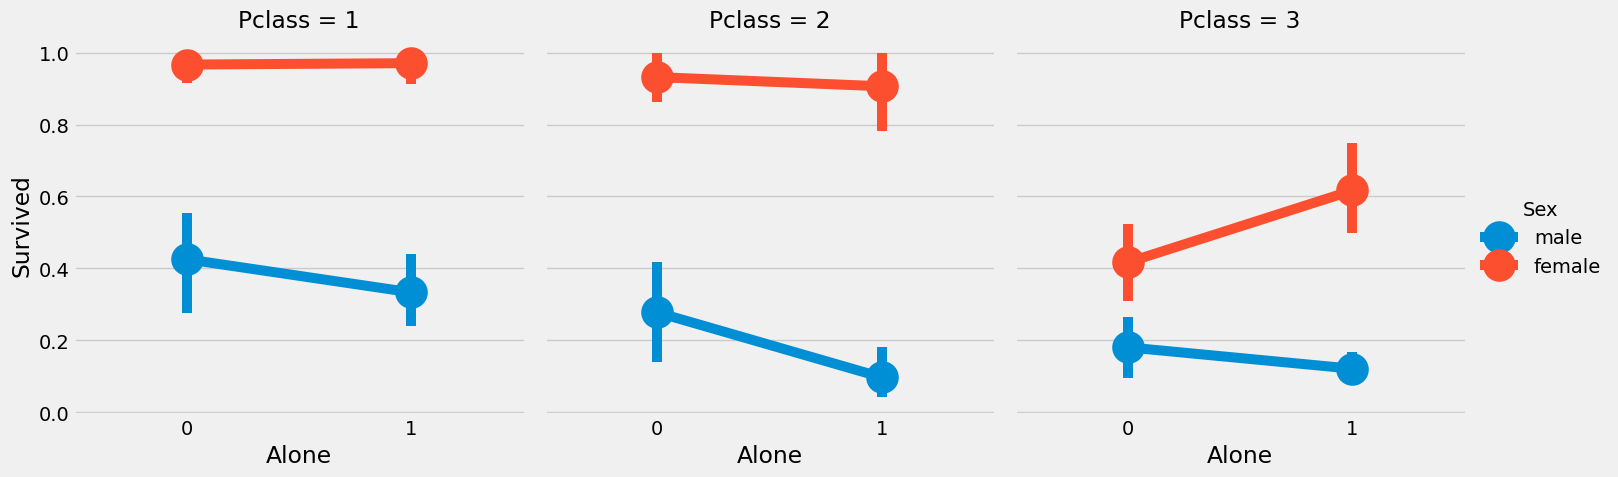

In [49]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

모든 Pclass에 대해 남성은 혼자 온 승객일 경우 생존율이 낮아진다. 여성은 Pclass가 2인 경우를 제외하고(이 경우도 그 차이가 미미하지만) 동반 승객이 있는 경우에 생존율이 증가하거나 변함이 없다

## **Fare_Range**



continuous feature이므로 ordinal value로 바꿔줌 : **pandas.qcut** 이용

**pandas.qcut**

splits or arranges the values according the number of bins
*(if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges)*

In [50]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 증가할 수록 생존율이 높아짐

In [52]:
# Fare_Range > singleton value로 변환

data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31.0), 'Fare_cat']=2
data.loc[(data['Fare']>31.0) & (data['Fare']<=513), 'Fare_cat']=3

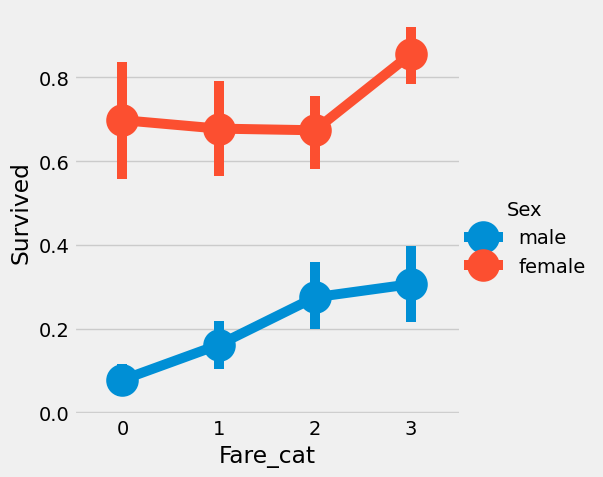

In [54]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

Fare_cat increases > Survival chances increase

## **Converting String Values into Numeric**

ML 모델에서 string을 처리할 수 없으므로 범주형 변수들(Sex, Embarked, ect)을 numeric으로 변환해주어야함

In [56]:
data['Sex'].replace(['male','female'],[0,1],inplace=True) # male : 0, female : 1
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**Dropping UnNeeded Features**

Drop *Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId*

* Age : Age_band를 사용
* Fare, Fare_Range : Fare_cat 사용
* Cabin : NaN 너무 많고, 여러개의 cabin을 가진 승객이 많음(useless)
* PassengerId, Name : 범주형 변수로 변환이 불가능

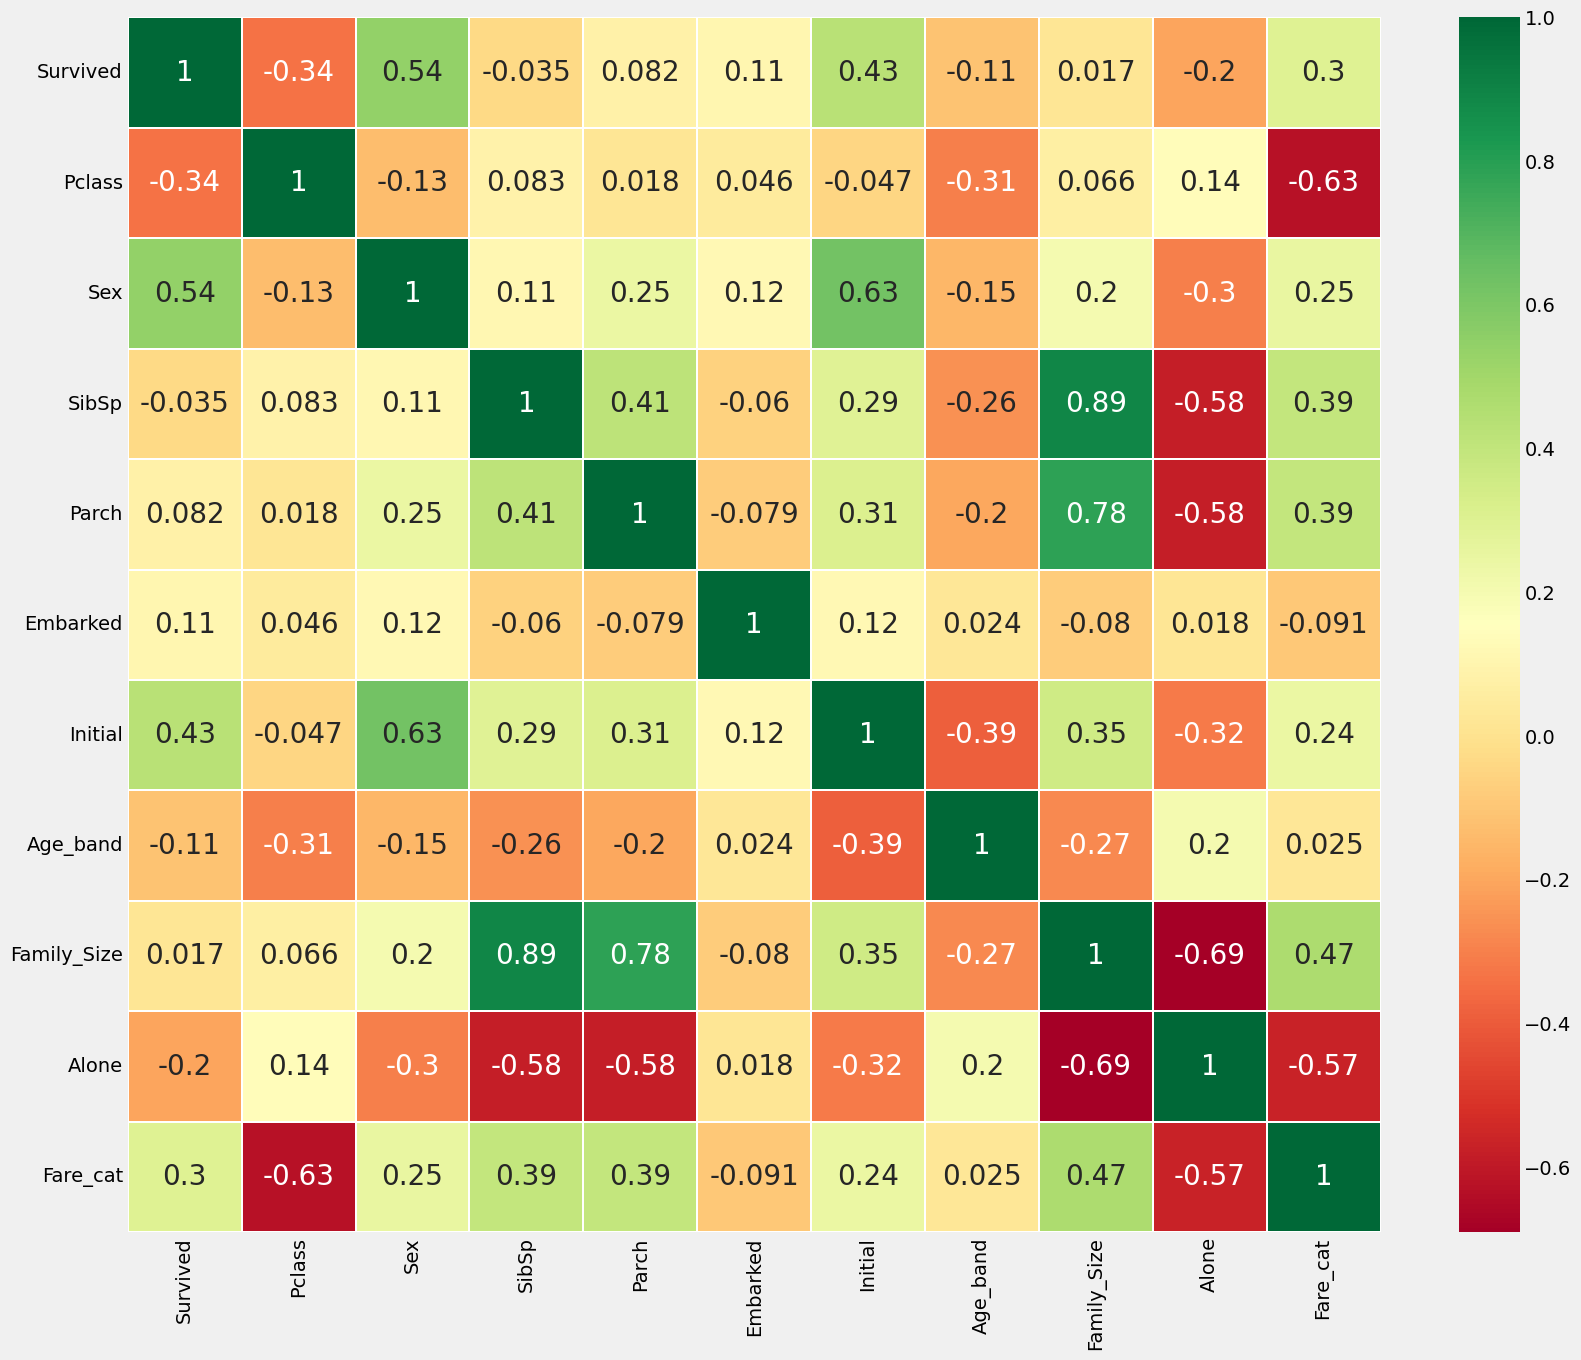

In [59]:
#data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.show()

# **Part3. Predictive Modeling**

< 사용할 모델 >

* Logistic Regression
* Support Vector Machines(Linear and radial)
* Random Forest
* K-Nearest Neighbors
* Naive Bayes
* Decision Tree

In [60]:
# import all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm    #support vector machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [63]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]  # data에서 0번째 column이 survived임
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## **Radial Support Vector Machines(rbf-SVM)**

In [83]:
model = svm.SVC(kernel='rbf',C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.835820895522388


## **Linear Support Vector Machine(linear-SVM)**

In [82]:
model = svm.SVC(kernel='linear',C=0.1, gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


## **Logistic Regression**

In [81]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is',metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is 0.8134328358208955


## **Decision Tree**

In [80]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is 0.8097014925373134


## **K-Nearest Neighbors(KNN)**

In [68]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is', metrics.accuracy_score(prediction5, test_Y))

Accuracy for KNN is 0.8134328358208955


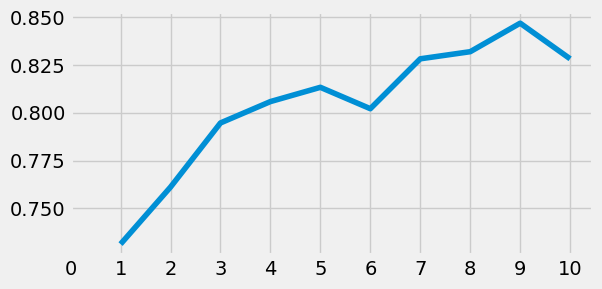

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [89]:
# KNN model에서 n_neighbors 조건 변경 (default=5)
a_index = list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a._append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)          # 생략 시 2,4,6,8 에만 tick이 생김
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

## **Gaussian Naive Bayes**

In [74]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

Accuracy for NaiveBayes is 0.8134328358208955


## **Random Forest**

In [75]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forest is', metrics.accuracy_score(prediction7, test_Y))

Accuracy for Random Forest is 0.8208955223880597


## **Cross Validation - KFold**

Many times, the data is imbalanced (i.e. there may be a high number of class 1, but less number of other class instances)

> We should *train and test our algorithm on each and every instance of the dataset, and take average* of all the noted accuracies over the dataset



In [85]:
from sklearn.model_selection import KFold  # K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

model1 = svm.SVC(kernel='linear'); model2=svm.SVC(kernel='rbf'); model3=LogisticRegression();
model4=KNeighborsClassifier(n_neighbors=9); model5=DecisionTreeClassifier(); model6 = GaussianNB();
model7=RandomForestClassifier(n_estimators=100)

models = [model1, model2, model3, model4, model5, model6, model7]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.804732,0.044629
Naive Bayes,0.795843,0.054861
Random Forest,0.811511,0.043096


<Axes: >

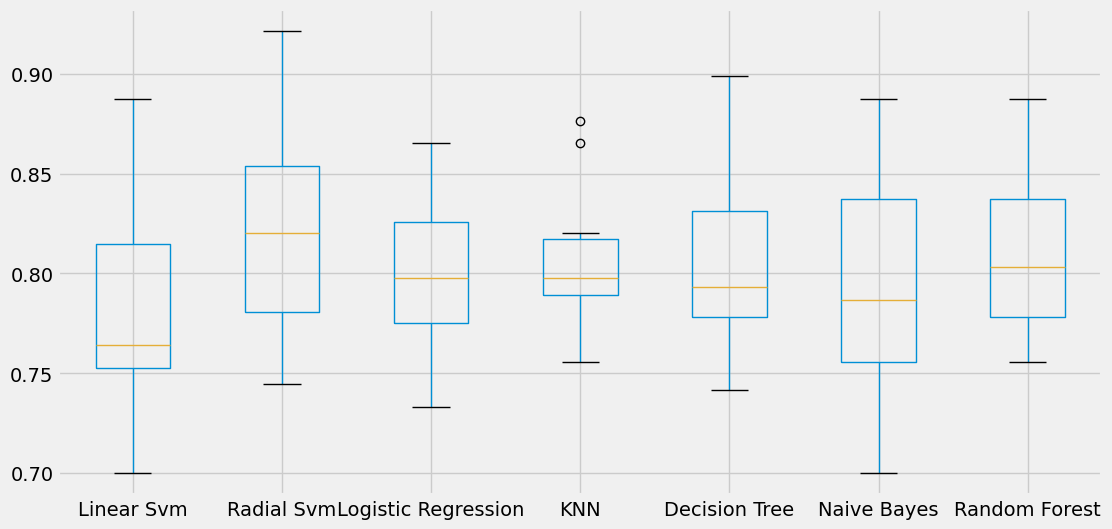

In [93]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()

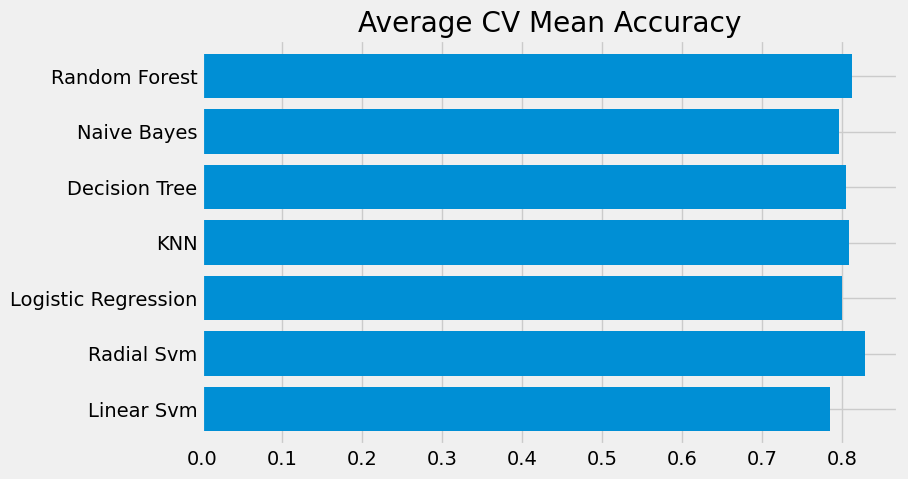

In [87]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## **Confusion Matrix**

imbalanced data 에서는 accuracy를 잘못 해석하기 쉬움. 따라서 confusion matrix와 함께 accuracy를 해석하는 것이 좋음

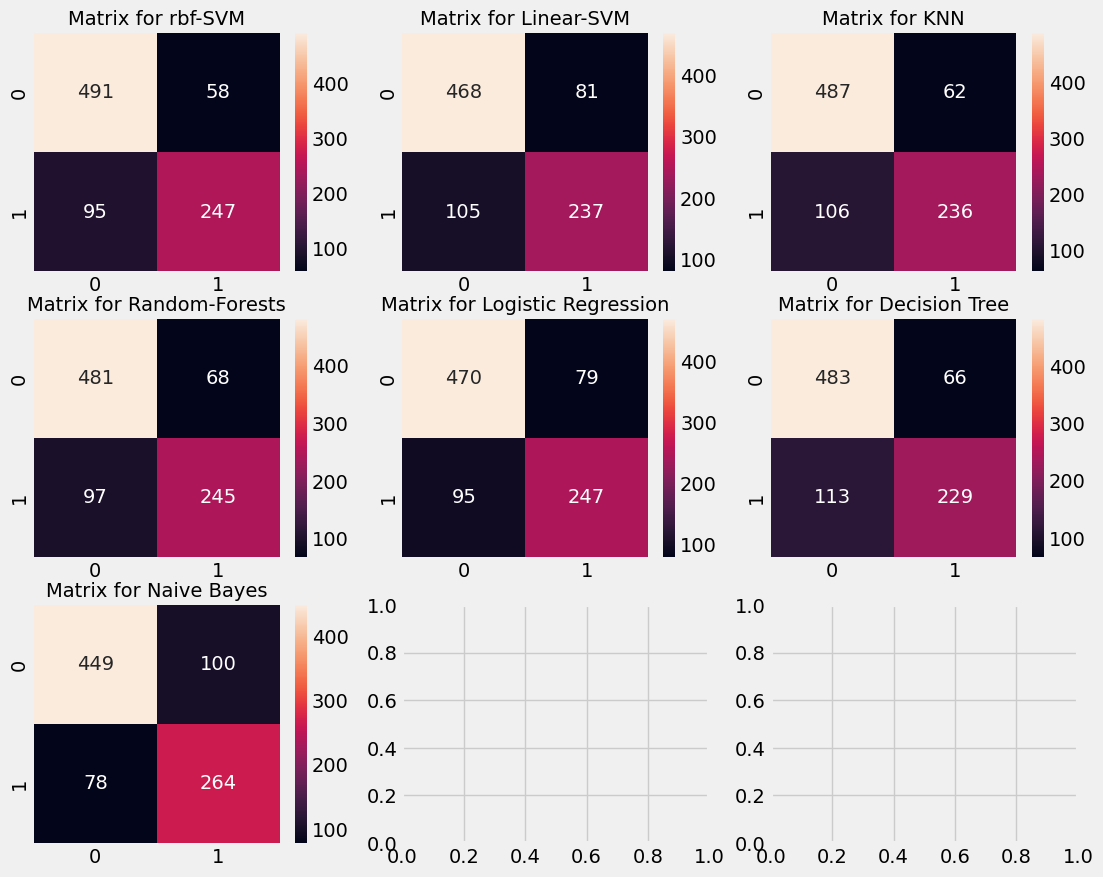

In [96]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM', fontsize=14)

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM', fontsize=14)

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN', fontsize=14)

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests', fontsize=14)

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression', fontsize=14)

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree', fontsize=14)

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes', fontsize=14)

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## **Hyper-Parameters Tuning**

**SVM**

In [100]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


Best score for SVM : 0.8282 with C=0.4, gamma=0.3  (where is kernel???)

**Random Forest**

조절하는 parameter : n_estimators

In [101]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Best score for Random Forest : 0.8193 with n_estimators=300

## **Ensembling**

A good way to increase the accuracy or performance of a model

> the Combination of various simple models creates a single powerful model !!

* Voting Classifier
* Bagging
* Boosting

**Voting Classifier**

In [102]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],
                                  voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


**Bagging**

In [104]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


**Bagging DecisionTree**

In [105]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


**Boosting**

AdaBoost (Adaptive Boosting)
* weak learner : Decision Tree

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


Stochastic Gradient Boosting

* weak learner : Decision Tree

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


XGBoost

In [108]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


**Hyper-Parameter Tuning for AdaBoost**

In [109]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


Best score for AdaBoost : 0.8293 with n_estimators=100, learning_rate=0.1

**Confusion Matrix for the Best Model**

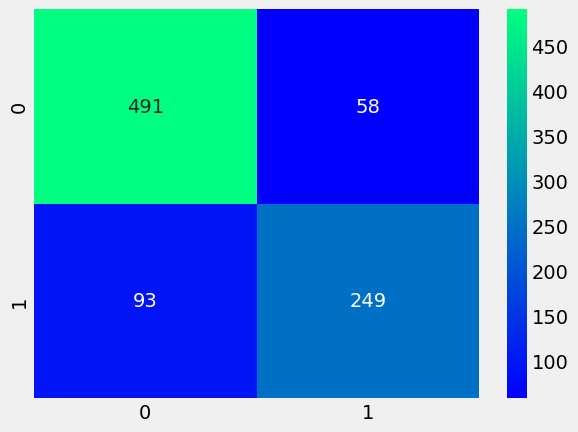

In [110]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter',annot=True, fmt='2.0f')
plt.show()

**Feature Importance**

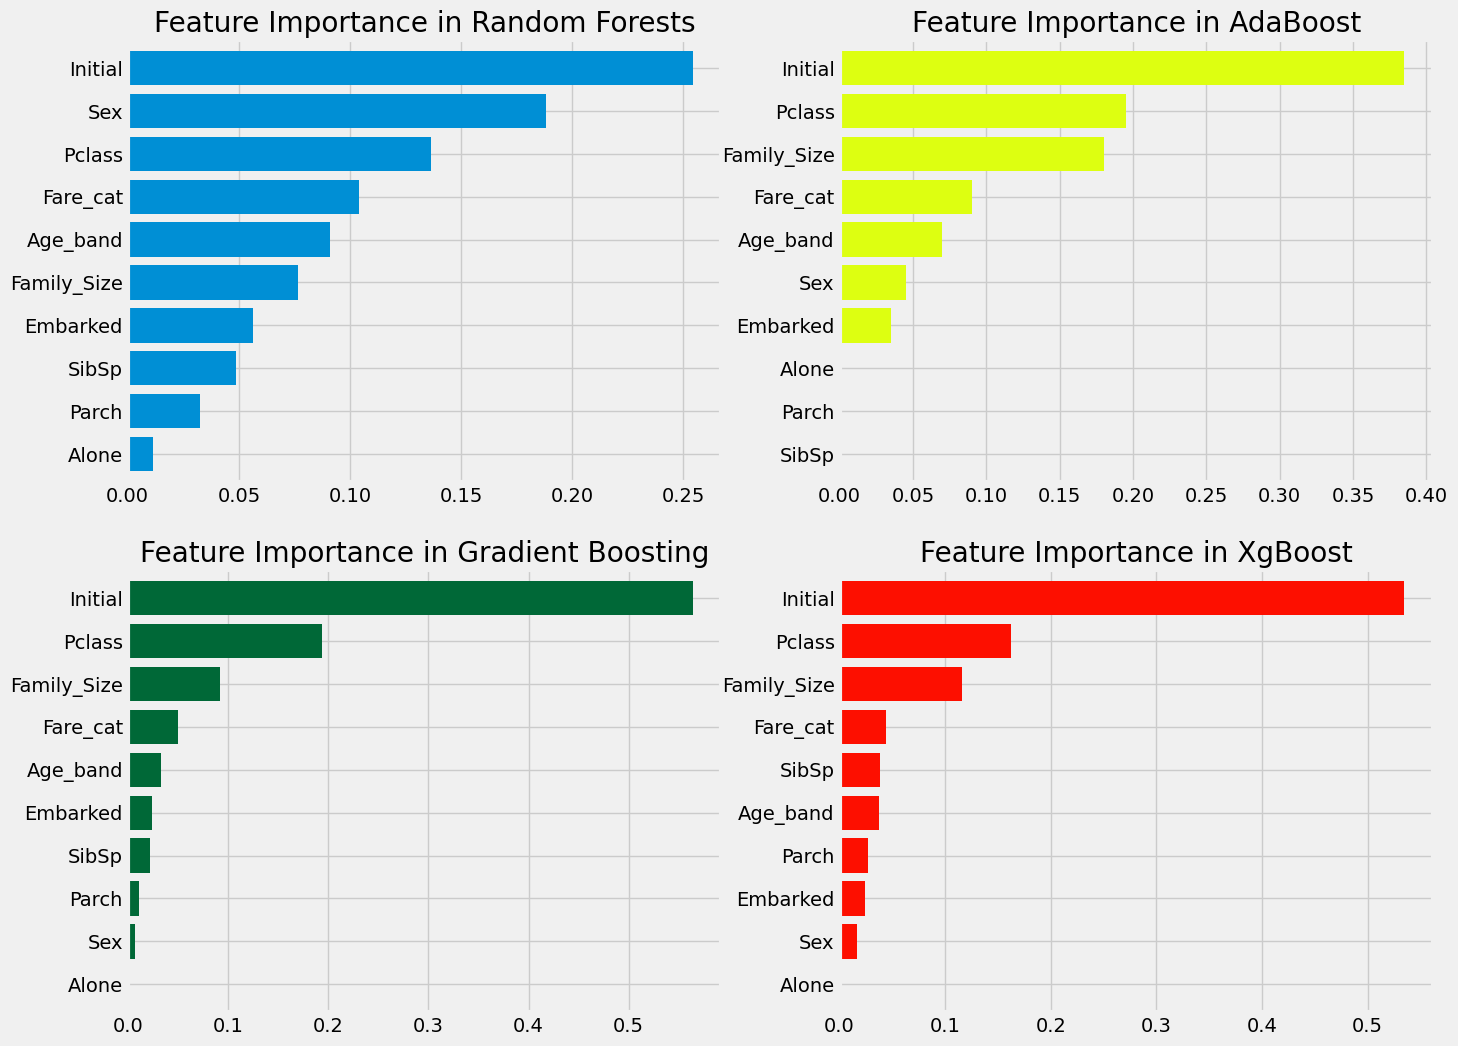

In [111]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()